# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA"

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA


/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset_np # type: ignore
from GMetrics.utils import se_mean, se_std
from GMetrics.metrics.NPLM import candidate_sigma

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2025-10-29 11:52:46.488660: Importing os...
2025-10-29 11:52:46.488970: Importing sys...
Visible devices: [0]
2025-10-29 11:52:46.489213: Importing timer from timeit...
2025-10-29 11:52:46.489283: Setting env variables for tf import (only device(s) [0] will be available)...
2025-10-29 11:52:46.489415: Importing numpy...
2025-10-29 11:52:46.644997: Importing matplotlib...
2025-10-29 11:52:47.071108: Importing h5py...
2025-10-29 11:52:47.103466: Importing importlib.util...
2025-10-29 11:52:47.103584: Importing json...
2025-10-29 11:52:47.103647: Importing pandas...
2025-10-29 11:52:47.647386: Importing random...
2025-10-29 11:52:47.647532: Importing scipy utils...
2025-10-29 11:52:48.298796: Importing subprocess...
2025-10-29 11:52:48.298936: Importing textwrap...
2025-10-29 11:52:48.298996: Importing tensorflow...
Tensorflow version: 2.16.1
2025-10-29 11:52:52.635497: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2025-10-29 11:52:54.086328: Importing timeit.

/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2025-10-29 11:52:59.600966: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2025-10-29 11:52:59.643022: All done.


# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [6]:
results_dir = "results/jet_features/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories were created")
else:
    print("Directory alredy exists")

Directory alredy exists


In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_jet_features(jet_features):
    p_T_jet = jet_features[:,1]
    eta_jet = jet_features[:,2]
    m_jet = jet_features[:,3]
    m_jet_over_p_T_jet = m_jet / p_T_jet
    return tf.stack([p_T_jet, eta_jet, m_jet, m_jet_over_p_T_jet], axis=1)

jet_features_reduced = get_reduced_jet_features(jet_features)
jet_features_reduced.shape

TensorShape([177252, 4])

# TwoSample Test: null hypothesis

In [8]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '10K_preprocessed/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory {model_dir} has been created")
else:
    print(f"Directory {model_dir} already exists")

jet_features_reduced = get_reduced_jet_features(jet_features)

mean = tf.reduce_mean(jet_features_reduced, axis=0)
std = tf.math.reduce_std(jet_features_reduced, axis=0)
    
dataset = preprocess_data(jet_features_reduced, mean, std)

Directory results/jet_features/tests/10K_preprocessed/ already exists


## Bootstrapping Null Hypothesis

In [9]:
m_value = 10000
lam_value = 1e-8

In [10]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
    print(f"Directory {null_hypotheses_dir} has been created")
else:
    print(f"Directory {null_hypotheses_dir} already exists")
    
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

Directory results/jet_features/tests/10K_preprocessed/null_hypotheses/ already exists


In [11]:
alt_hypotheses_dir = os.path.join(model_dir, 'alternative_hypotheses/')
if not os.path.exists(alt_hypotheses_dir):
    os.makedirs(alt_hypotheses_dir)
    print(f"Directory {alt_hypotheses_dir} has been created")
else:
    print(f"Directory {alt_hypotheses_dir} already exists")

Directory results/jet_features/tests/10K_preprocessed/alternative_hypotheses/ already exists


In [12]:
niter_tot = 1_000
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)

niter: 8, nbootstrap: 125
Parsing input distribution...


Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.


In [13]:
flk_sigma = candidate_sigma(dist_1_null, perc = 90)  

Finite Dataset Case.
The Gaussian kernel sigma is estimated as the 90th percentile of the pairwise distance among 10000 points extracted from the reference data. 
The value of sigma is: 4.2


In [14]:
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)
NPLMMetric = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                 progress_bar = True,
                                 verbose = True,
                                 M = m_value, 
                                 lam = lam_value, 
                                 iter_list = 1000000,
                                 flk_sigma = flk_sigma,
                                 weight = 1) 

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [15]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputsNull.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,8,10000,1000,10000000,float64,0,True,False,None,True,False,4,80000,False,4,80000,float64,4,80000,True


In [16]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "object_name_alt": "FGDMetricAlt",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200, # optimized for 5D
                                       "latex": "t_{\mathrm{FGD}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json"),
                                       "alternative_file": os.path.join(alt_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "object_name_alt": "MMDMetricAlt",
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 8, # optimized for 5D
                                       "latex": "t_{\mathrm{MMD}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json"),
                                       "alternative_file": os.path.join(alt_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "object_name_alt": "KSTestAlt",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {"verbose": True}, 
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200,
                                       "latex": "t_{\overline{\mathrm{KS}}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json"),
                                       "alternative_file": os.path.join(alt_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "object_name_alt": "SKSTestAlt",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "t_{\mathrm{SKS}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json"),
                                       "alternative_file": os.path.join(alt_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "object_name_alt": "SWDMetricAlt",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "t_{\mathrm{SW}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json"),
                                       "alternative_file": os.path.join(alt_hypotheses_dir,"SWD.json")},
                                "NPLM": {"name": "nplm",
                                       "object_name": "NPLMMetric",
                                       "object_name_alt": "NPLMMetricAlt",
                                       "class_name": "GMetrics.NPLMMetric",
                                       "kwargs": {"M": m_value,
                                                  "lam": lam_value,
                                                  "iter_list": 1000000,
                                                  "flk_sigma": flk_sigma,
                                                  "weight" : 1},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "t_{\mathrm{NPLM}}",
                                       "null_file": null_hypotheses_dir+f"NPLM_M_{m_value}_lam_{lam_value}.json",
                                       "alternative_file": alt_hypotheses_dir+f"NPLM_M_{m_value}_lam_{lam_value}.json"}}}

print(metrics_config[unique_key])
nplm_config = metrics_config[unique_key]["swd"]
print(nplm_config)
print(metrics_config[unique_key]["NPLM"]["object_name"])

{'fgd': {'name': 'fgd', 'object_name': 'FGDMetricNull', 'object_name_alt': 'FGDMetricAlt', 'class_name': 'GMetrics.FGDMetric', 'kwargs': {'num_batches': 20, 'num_points': 10, 'normalise': False, 'verbose': True}, 'result_key': 'metric_list', 'scale_func': <function <lambda> at 0x7f18f677f060>, 'scale_func_string': 'lambda ns, ndims: 1', 'test_config': {'niter': 8, 'batch_size_test': 10000, 'batch_size_gen': 1000, 'small_sample_threshold': 10000000, 'dtype_input': 'float64', 'seed': 0, 'use_tf': True, 'mirror_strategy': False, 'strategy': None, 'verbose': True, 'is_symb_1': False, 'ndims_1': 4, 'nsamples_1': 80000, 'is_symb_2': False, 'ndims_2': 4, 'nsamples_2': 80000, 'dtype': 'float64', 'ndims': 4, 'nsamples': 80000, 'small_sample': True}, 'max_vectorize': 3200, 'latex': 't_{\\mathrm{FGD}}', 'null_file': 'results/jet_features/tests/10K_preprocessed/null_hypotheses/FGD.json', 'alternative_file': 'results/jet_features/tests/10K_preprocessed/alternative_hypotheses/FGD.json'}, 'mmd': {'na

In [17]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
            del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/jet_features/tests/10K_preprocessed/null_hypotheses/FGD.json
Loading mmd from results/jet_features/tests/10K_preprocessed/null_hypotheses/MMD.json
Loading ks from results/jet_features/tests/10K_preprocessed/null_hypotheses/KS.json
Loading sks from results/jet_features/tests/10K_preprocessed/null_hypotheses/SKS.json
Loading swd from results/jet_features/tests/10K_preprocessed/null_hypotheses/SWD.json
Loading nplm from results/jet_features/tests/10K_preprocessed/null_hypotheses/NPLM_M_10000_lam_1e-08.json


In [18]:
cl_list = [0.68, 0.95, 0.99]
null_times = []
ndims = 4

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [680, 319], 0.0003177620720642843], [0.95, [950, 50], 0.002344136360358939], [0.99, [990, 10], 0.0038600900297754643]]
Computing time for metric fgd: 243.17831545689842
ThresholdS for metric mmd: [[0.68, [680, 319], 0.0031414601380213014], [0.95, [950, 50], 0.06546412201622864], [0.99, [990, 10], 0.11430113838249412]]
Computing time for metric mmd: 376.53765143919736
ThresholdS for metric ks: [[0.68, [680, 319], 0.9245422251402801], [0.95, [950, 50], 1.1649589125941537], [0.99, [990, 10], 1.3081486157250652]]
Computing time for metric ks: 146.6307499530958
ThresholdS for metric sks: [[0.68, [680, 319], 0.9122387698065405], [0.95, [950, 50], 1.1021677474292142], [0.99, [990, 10], 1.231356135775905]]
Computing time for metric sks: 410.4776519081788
ThresholdS for metric swd: [[0.68, [680, 319], 0.6976663113337422], [0.95, [950, 50], 0.9085089502197531], [0.99, [990, 10], 1.0293249973686645]]
Computing time for metric swd: 140.5390638174722
ThresholdS fo

,name,object_name,object_name_alt,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,alternative_file,thresholds
0,fgd,FGDMetricNull,FGDMetricAlt,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7f18f677f060>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",3200,t_{\mathrm{FGD}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.0003177620720642843], [0..."
1,mmd,MMDMetricNull,MMDMetricAlt,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7f18f677c220>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",8,t_{\mathrm{MMD}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.0031414601380213014], [0..."
2,ks,KSTestNull,KSTestAlt,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7f18f668a340>,"lambda ns, _: np.sqrt(ns)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",3200,t_{\overline{\mathrm{KS}}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.9245422251402801], [0.95..."
3,sks,SKSTestNull,SKSTestAlt,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f18f668a200>,"lambda ns, _: np.sqrt(ns)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",100,t_{\mathrm{SKS}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.9122387698065405], [0.95..."
4,swd,SWDMetricNull,SWDMetricAlt,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f18f668a2a0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",100,t_{\mathrm{SW}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.6976663113337422], [0.95..."
5,nplm,NPLMMetric,NPLMMetricAlt,GMetrics.NPLMMetric,"{'M': 10000, 'lam': 1e-08, 'iter_list': 100000...",metric_list,<function <lambda> at 0x7f18f668a3e0>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",1000,t_{\mathrm{NPLM}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 196.86464382187376], [0.95..."


### Plots of null-distributions

mu = 0.0004546584814224862 +/- 2.339258076575736e-08
sigma = 0.0008600804355944799 +/- 5.162707360926315e-05
68%CL = 0.0003177620720642843, 95%CL = 0.002344136360358939, 99%CL = 0.0038600900297754643
mu = 0.0004546584814224862 +/- 2.339258076575736e-08
sigma = 0.0008600804355944799 +/- 5.162707360926315e-05


/tmp/ipykernel_124309/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_124309/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_124309/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


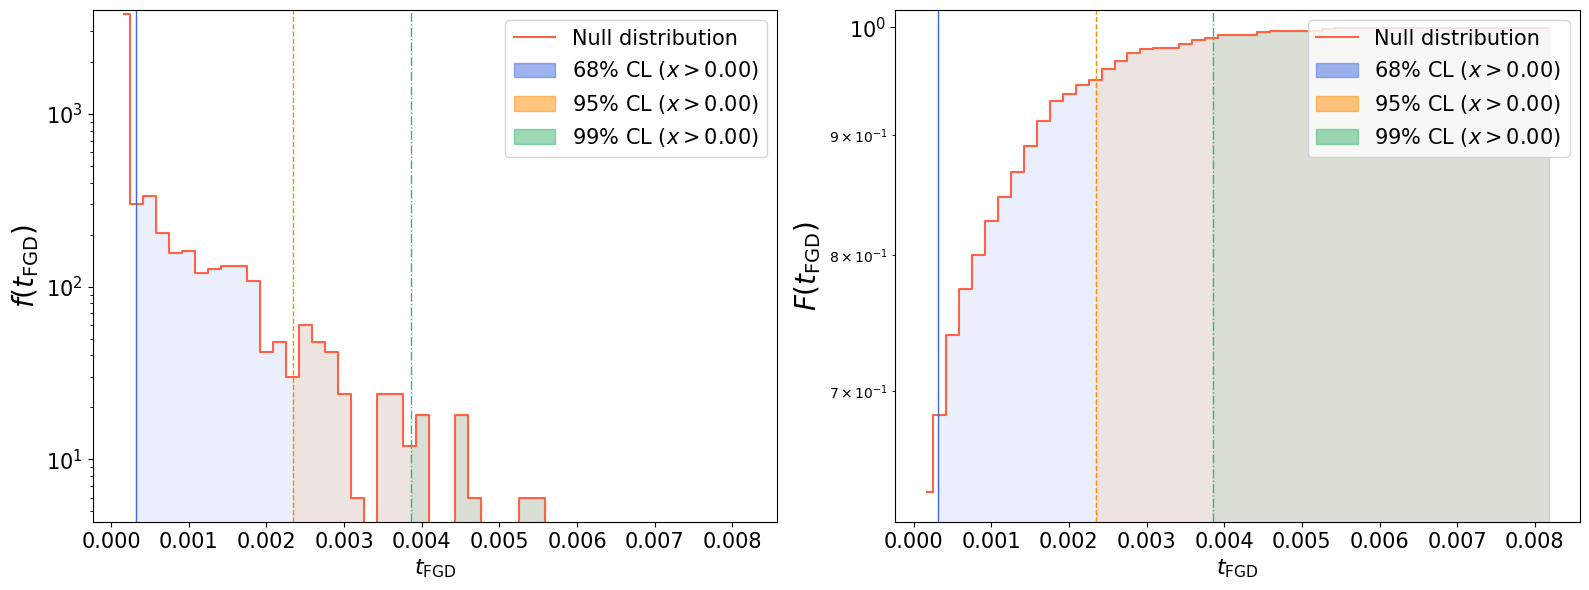

Time elapsed: 1.1215973180078436 seconds.
mu = 6.28584945266546e-05 +/- 3.001947968954089e-05
sigma = 0.03081070106182486 +/- 0.0012475120321101048
68%CL = 0.0031414601380213014, 95%CL = 0.06546412201622864, 99%CL = 0.11430113838249412
mu = 6.28584945266546e-05 +/- 3.001947968954089e-05
sigma = 0.03081070106182486 +/- 0.0012475120321101048


/tmp/ipykernel_124309/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_124309/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_124309/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_124309/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


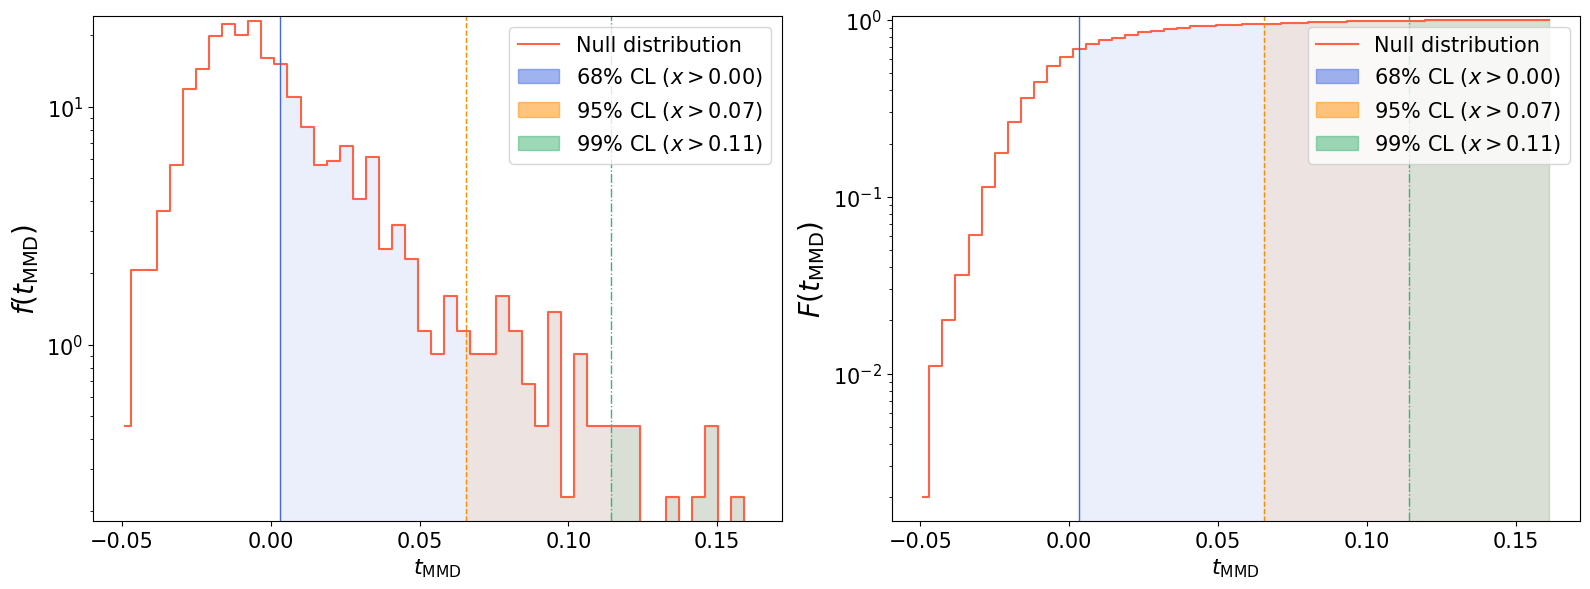

Time elapsed: 0.6736703200003831 seconds.
mu = 0.8722713954511667 +/- 0.0007419902874814465
sigma = 0.15317895776393348 +/- 0.00372270332758937
68%CL = 0.9245422251402801, 95%CL = 1.1649589125941537, 99%CL = 1.3081486157250652
mu = 0.8722713954511667 +/- 0.0007419902874814465
sigma = 0.15317895776393348 +/- 0.00372270332758937


/tmp/ipykernel_124309/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_124309/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_124309/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_124309/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


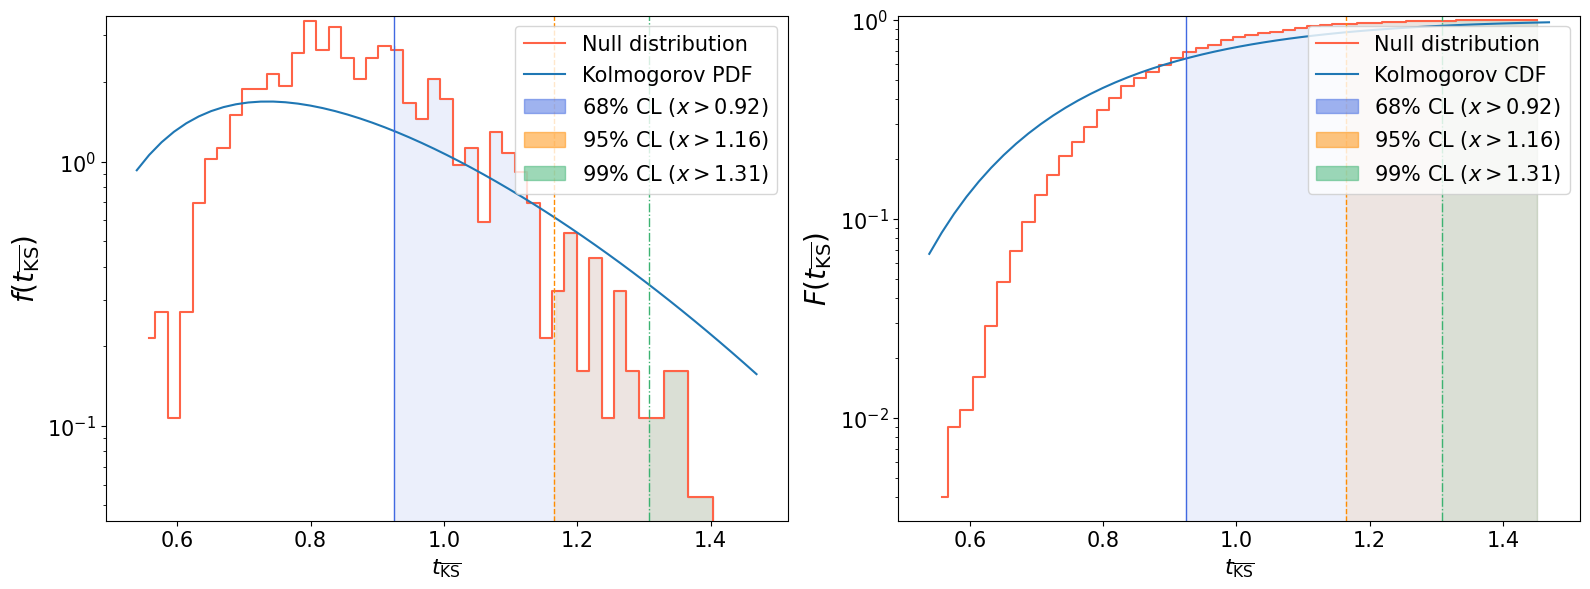

Time elapsed: 1.225817554994137 seconds.
mu = 0.8672842946916773 +/- 0.0005121076471170057
sigma = 0.12725669224364977 +/- 0.0031500733220112226
68%CL = 0.9122387698065405, 95%CL = 1.1021677474292142, 99%CL = 1.231356135775905
mu = 0.8672842946916773 +/- 0.0005121076471170057
sigma = 0.12725669224364977 +/- 0.0031500733220112226


/tmp/ipykernel_124309/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_124309/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_124309/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_124309/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


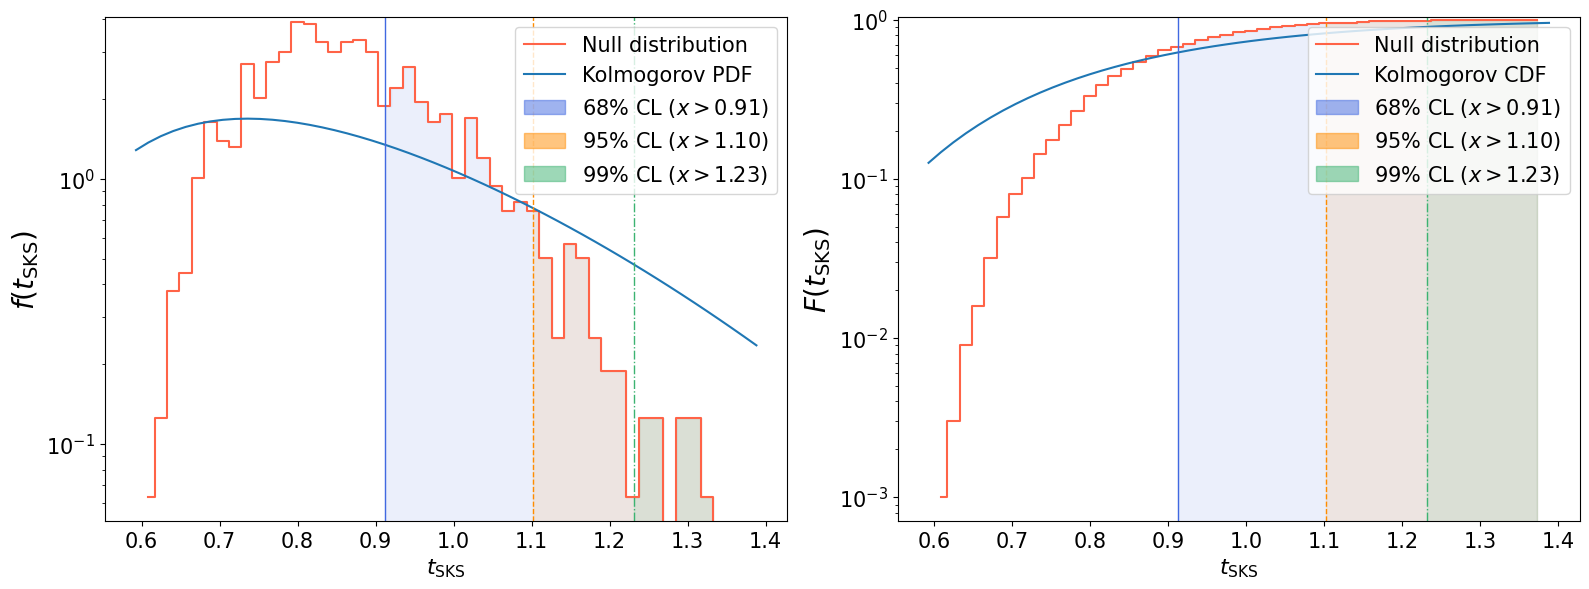

Time elapsed: 1.0571029770071618 seconds.
mu = 0.6585761248792799 +/- 0.0005330023780906096
sigma = 0.12982686598129659 +/- 0.0036016596403284553
68%CL = 0.6976663113337422, 95%CL = 0.9085089502197531, 99%CL = 1.0293249973686645
mu = 0.6585761248792799 +/- 0.0005330023780906096
sigma = 0.12982686598129659 +/- 0.0036016596403284553


/tmp/ipykernel_124309/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_124309/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_124309/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_124309/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


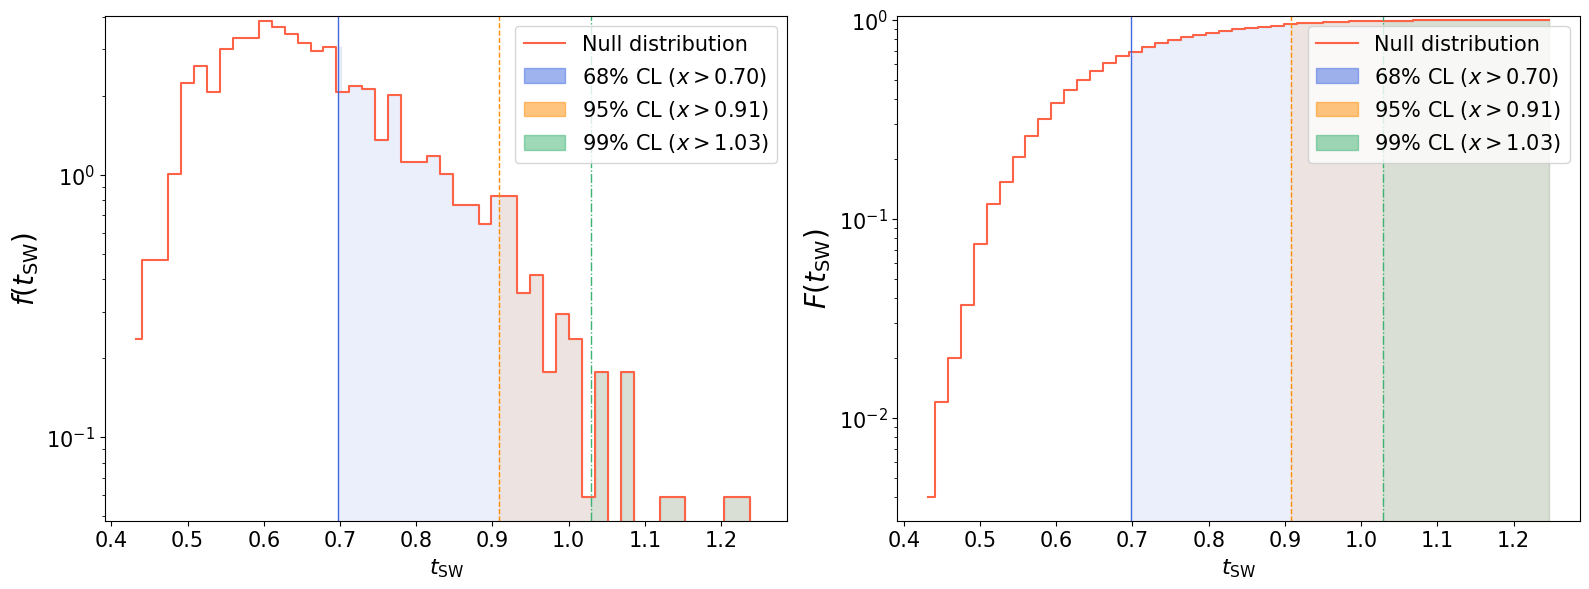

Time elapsed: 0.6961607959965477 seconds.
mu = 185.30023412492366 +/- 21.21785850977759
sigma = 25.903042285045053 +/- 0.5858921941499443
68%CL = 196.86464382187376, 95%CL = 229.73788302547183, 99%CL = 247.45609126492752
mu = 185.30023412492366 +/- 21.21785850977759
sigma = 25.903042285045053 +/- 0.5858921941499443


/tmp/ipykernel_124309/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_124309/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_124309/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_124309/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


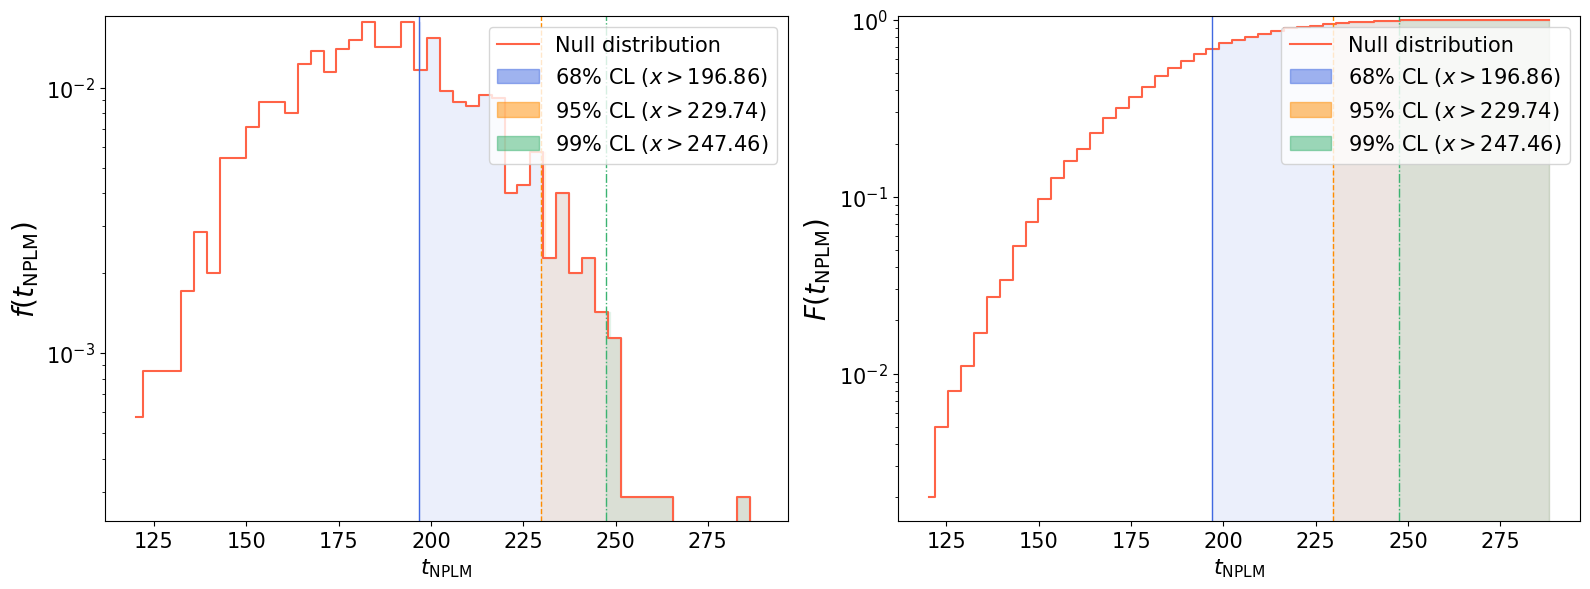

Time elapsed: 0.6957235549925826 seconds.


,name,object_name,object_name_alt,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,alternative_file,thresholds,null_figure
0,fgd,FGDMetricNull,FGDMetricAlt,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7f18f677f060>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",3200,t_{\mathrm{FGD}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.0003177620720642843], [0...",results/jet_features/tests/10K_preprocessed/nu...
1,mmd,MMDMetricNull,MMDMetricAlt,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7f18f677c220>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",8,t_{\mathrm{MMD}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.0031414601380213014], [0...",results/jet_features/tests/10K_preprocessed/nu...
2,ks,KSTestNull,KSTestAlt,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7f18f668a340>,"lambda ns, _: np.sqrt(ns)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",3200,t_{\overline{\mathrm{KS}}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.9245422251402801], [0.95...",results/jet_features/tests/10K_preprocessed/nu...
3,sks,SKSTestNull,SKSTestAlt,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f18f668a200>,"lambda ns, _: np.sqrt(ns)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",100,t_{\mathrm{SKS}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.9122387698065405], [0.95...",results/jet_features/tests/10K_preprocessed/nu...
4,swd,SWDMetricNull,SWDMetricAlt,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f18f668a2a0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 8, 'batch_size_test': 10000, 'batch_...",100,t_{\mathrm{SW}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 0.6976663113337422], [0.95...",results/jet_features/tests/10K_preprocessed/nu...
5,nplm,NPLMMetric,NPLMMetricAlt,GMetrics.NPLMMetric,"{'M': 10000, 'lam': 1e-08, 'iter_list': 100000...",metric_list,<function <lambda> at 0x7f18f668a3e0>,"lambda ns, ndims: 1","{'niter': 8, 'batch_size_test': 10000, 'batch_...",1000,t_{\mathrm{NPLM}},results/jet_features/tests/10K_preprocessed/nu...,results/jet_features/tests/10K_preprocessed/al...,"[[0.68, [680, 319], 196.86464382187376], [0.95...",results/jet_features/tests/10K_preprocessed/nu...


In [19]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"$%s$" % latex, fontsize=16)
    ax[0].set_ylabel(r"$f(%s)$" % latex, fontsize=20)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"$%s$"%latex, fontsize=16)
    ax[1].set_ylabel(r"$F(%s)$" % latex, fontsize=20)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

# Data to test against the null

## Generate random sample to test

In [44]:
rndm_sample = tf.random.normal(shape=(10000, 4), mean=0.0, stddev=1.0, dtype=tf.float32)
rndm_sample_np = rndm_sample.numpy()

In [ ]:
rndm_sample_more_points = tf.random.normal(shape=(1749846, 4), mean=0.0, stddev=1.0, dtype=tf.float32)
rndm_sample_more_points_np = rndm_sample_more_points.numpy()

: 

In [ ]:
fake_data_dir = "fake_data/jet_features/"
if not os.path.exists(fake_data_dir):
    os.makedirs(fake_data_dir)
    print("Fake data directory was created")
else:
    print("Directory alredy exists")
    
fake_data_dir_model = os.path.join(fake_data_dir, '10K_preprocessed/')
if not os.path.exists(fake_data_dir_model):
    os.makedirs(fake_data_dir_model)
    print("Fake data 10K directory was created")
else:
    print("Directory alredy exists")

Directory alredy exists
Directory alredy exists


: 

## Put data into folder 

In [ ]:
print("Put your data into the folder '/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA/fake_data/jet_features/10K_preprocessed'")

Put your data into the folder '/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA/fake_data/jet_features/10K_preprocessed'


: 

In [ ]:
np.save(f"{fake_data_dir_model}/sample_first_try.npy", rndm_sample_np)

: 

In [ ]:
np.save(f"{fake_data_dir_model}/sample_second_try.npy", rndm_sample_more_points_np)

: 

## Load data

In [ ]:
import numpy as np
import os
import json
import pickle

try:
    import torch
    HAS_TORCH = True
except ImportError:
    HAS_TORCH = False

try:
    import tensorflow as tf
    HAS_TF = True
except ImportError:
    HAS_TF = False


def load_any_sample(filename):
    path = os.path.join(fake_data_dir_model, filename)

    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")

    ext = os.path.splitext(path)[1].lower()

    try:
        if ext == ".npy":
            sample = np.load(path)
        elif ext == ".npz":
            data = np.load(path)
            sample = data[list(data.keys())[0]]
        elif ext in [".pt", ".pth"]:
            if not HAS_TORCH:
                raise ImportError("PyTorch is not installed.")
            sample = torch.load(path)
            if isinstance(sample, torch.Tensor):
                sample = sample.detach().cpu().numpy()
            elif isinstance(sample, (list, tuple)):
                sample = np.array([
                    t.detach().cpu().numpy() if isinstance(t, torch.Tensor) else t for t in sample
                ])
            else:
                sample = np.array(sample)
        elif ext == ".csv":
            sample = np.loadtxt(path, delimiter=",")
        elif ext == ".json":
            with open(path) as f:
                data = json.load(f)
            sample = np.array(data)
        elif ext == ".txt":
            sample = np.loadtxt(path)
        elif ext == ".tfrecord":
            if not HAS_TF:
                raise ImportError("TensorFlow is not installed.")
            raw_dataset = tf.data.TFRecordDataset(path)
            sample = list(raw_dataset.as_numpy_iterator())
            sample = np.array(sample)
        elif ext == ".h5":
            if not HAS_TF:
                raise ImportError("TensorFlow is not installed.")
            sample = np.array(tf.keras.models.load_model(path))
        else:
            with open(path, "rb") as f:
                data = pickle.load(f)
            sample = np.array(data)

    except Exception as e:
        raise ValueError(f"Error loading file {path} ({ext}): {e}")

    if not isinstance(sample, np.ndarray):
        sample = np.array(sample)

    print(f"✅ Sample loaded with shape {sample.shape} and dtype {sample.dtype}")
    return sample



: 

In [ ]:
alternative_data = load_any_sample('sample_first_try.npy')

✅ Sample loaded with shape (10000, 4) and dtype float32


: 

In [ ]:
alternative_data_more_points = load_any_sample('sample_second_try.npy')

✅ Sample loaded with shape (1749846, 4) and dtype float32


: 

In [ ]:
print(np.shape(rndm_sample_np))
print(rndm_sample_np[485,:])

print(np.shape(alternative_data))
print(alternative_data[485,:])

(10000, 4)
[-0.42149323  1.5550064  -0.6968753  -0.6854744 ]
(10000, 4)
[-0.42149323  1.5550064  -0.6968753  -0.6854744 ]


: 

In [ ]:
print(np.shape(rndm_sample_more_points_np))
print(rndm_sample_more_points_np[485,:])

print(np.shape(alternative_data_more_points))
print(alternative_data_more_points[485,:])

(1749846, 4)
[ 1.6565137  -0.04178132 -0.14987805 -2.311857  ]
(1749846, 4)
[ 1.6565137  -0.04178132 -0.14987805 -2.311857  ]


: 

# Try To Test Alternative...we have to use the same test as null because here we have no epsilon


In [ ]:
#Set up the 2 datasets you are going to test one against the other

# This time you dont need to split dataset in half, given that you test it against other data

del(niter_tot)
batch_size_test = 10_000
niter_tot = len(alternative_data_more_points) // batch_size_test    #this is to decide how many points to test based on alternative_data length. if you want to bootstrap 
                                                           #also alternative_data change here. up to now you test as much as alternative_data permits without resampling
print(f"niter_tot: {niter_tot}")


if len(alternative_data_more_points) <= len(dataset):
    niter = len(alternative_data_more_points) // batch_size_test    #how many point you can test from the reference 
    nbootstrap = 1                                         #nbootstrap is how many times you have to shuffle the original dataset and sample from it 
else: 
    niter = len(dataset) // batch_size_test                #niter is based on JetNet original dataset (should work if the alternative_data is bigger than JetNet)
    nbootstrap = niter_tot // niter

niter_tot = niter * nbootstrap

print(f"niter: {niter}, nbootstrap: {nbootstrap}, niter_tot: {niter_tot}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset)
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp, tf.float64)
del(dstmp)

TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = alternative_data_more_points,
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                             progress_bar = True,
                             verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)
NPLMMetricAlt = GMetrics.NPLMMetric(TwoSampleTestInputsAlt,
                                 progress_bar = True,
                                 verbose = True,
                                 M = m_value, 
                                 lam = lam_value, 
                                 iter_list = 1000000,
                                 flk_sigma = flk_sigma,
                                 weight = 1) 

niter_tot: 174
niter: 17, nbootstrap: 10, niter_tot: 170
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.


To use tf mode, please use tf distributions or numerical tensors/arrays.
Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a numberic numpy array or tf.Tensor
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [41]:
for metric in list(metrics_config[unique_key].values()):
    file_alt = metric["alternative_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj_alt = eval(metric["object_name_alt"])
    if os.path.exists(file_alt):
        print(f"Loading {name} from {file_alt}")
        obj_alt.Results.load_from_json(file_alt)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj_alt.Test_np()
        for i in range(1, nbootstrap):
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp, tf.float64)
            dist_2_null = alternative_data_more_points
        #     #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsAlt._dist_1_num = dist_1_null[:niter*batch_size_test,:] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
        #     #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsAlt._dist_2_num = dist_2_null[i*niter*batch_size_test:(i+1)*niter*batch_size_test,:] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj_alt.Test_np()
            del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file_alt}")
        obj_alt.Results.save_to_json(file_alt)

Loading fgd from results/jet_features/tests/10K_preprocessed/alternative_hypotheses/FGD.json
Loading mmd from results/jet_features/tests/10K_preprocessed/alternative_hypotheses/MMD.json
Loading ks from results/jet_features/tests/10K_preprocessed/alternative_hypotheses/KS.json
Loading sks from results/jet_features/tests/10K_preprocessed/alternative_hypotheses/SKS.json
Loading swd from results/jet_features/tests/10K_preprocessed/alternative_hypotheses/SWD.json
Loading nplm from results/jet_features/tests/10K_preprocessed/alternative_hypotheses/NPLM_M_10000_lam_1e-08.json


# Compute p-value with respect to the null hypothesis

In [42]:
ndims = 4

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    obj_alt = eval(metric["object_name_alt"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)      #I think it is not relevant here
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    # print(f"{metric['name']} scale function value: {scale_func(ns, ndims)}")     #Check, you can remove
    # print(f"{metric['name']} null_hypothesis length: {len(dist_null)}")          #Check, you can remove
       
    alternative_results = np.array(obj_alt.Results[0].result_value[result_key])
    for i in range(1,len(obj_alt.Results)):
        alternative_results = np.concatenate((alternative_results, np.array(obj_alt.Results[i].result_value[result_key])))
    alternative_results = alternative_results * scale_func(ns, ndims)
    mean_alternative = np.mean(alternative_results)
    # print(f"{metric['name']} mean of alternative: {mean_alternative}")           #Check, you can remove
    
    bigger_than_mean_alternative = sum(1 for x in dist_null if x > mean_alternative)
    # print(f"{metric['name']} null bigger than alternative: {bigger_than_mean_alternative}")  #Check, you can remove
    
    p_value = bigger_than_mean_alternative/len(dist_null)   #Maybe should be (len(dist_null)+1, as mean_alternative is an additional point, but i am not sure)
    print(f"P-value for metric {metric['name']} is: {p_value}")    
    
# GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

P-value for metric fgd is: 0.0
P-value for metric mmd is: 0.352
P-value for metric ks is: 0.0
P-value for metric sks is: 0.0
P-value for metric swd is: 0.0
P-value for metric nplm is: 0.0
